In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from glob import glob
from hydra import initialize, compose
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
try:
    with initialize(version_base=None, config_path='config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']
except:
    with initialize(version_base=None, config_path='../../config'):
        config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.plots import plot
from mejiro.lenses import lens_util
from mejiro.utils import util

In [ ]:
pipeline_params = util.hydra_to_dict(config.pipeline)
debugging = pipeline_params['debugging']
if debugging:
    pipeline_dir = f'{config.machine.pipeline_dir}_dev'
else:
    pipeline_dir = config.machine.pipeline_dir
print(f'{pipeline_dir=}')

all_lenses = lens_util.get_detectable_lenses(pipeline_dir, with_subhalos=True, verbose=True)

pipeline_dir='/data/bwedig/mejiro/pipeline_dev'


 77%|███████▋  | 5123/6662 [01:53<00:29, 51.50it/s] 

In [3]:
lens = np.random.choice(all_lenses)

pprint(lens.kwargs_lens_light_dict)

{'F062': {'R_sersic': 0.1031113381330762,
          'center_x': -0.21783576673125454,
          'center_y': -0.06932967900000755,
          'e1': -0.06713107182418138,
          'e2': -0.08723189637957811,
          'magnitude': 21.841058617914868,
          'n_sersic': 4.0},
 'F087': {'R_sersic': 0.1031113381330762,
          'center_x': -0.21783576673125454,
          'center_y': -0.06932967900000755,
          'e1': -0.06713107182418138,
          'e2': -0.08723189637957811,
          'magnitude': 20.763506175420872,
          'n_sersic': 4.0},
 'F106': {'R_sersic': 0.1031113381330762,
          'center_x': -0.21783576673125454,
          'center_y': -0.06932967900000755,
          'e1': -0.06713107182418138,
          'e2': -0.08723189637957811,
          'magnitude': 20.367089197974003,
          'n_sersic': 4.0}}


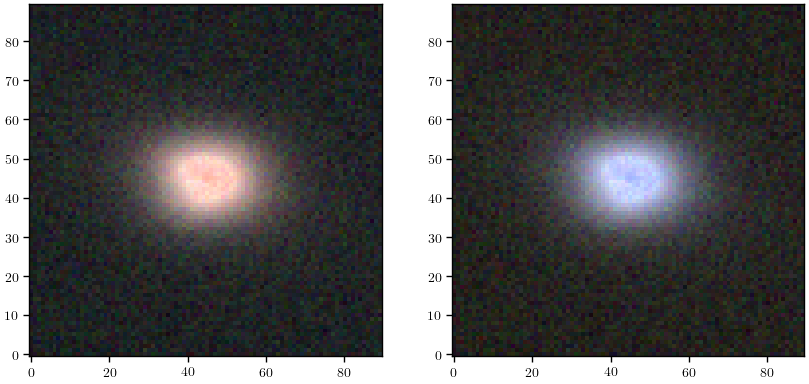

In [6]:
# lens = [l for l in all_lenses if l.uid == '00000569'][0]

_, f129, rgb_image = lens_util.get_sample(pipeline_dir, index=lens.uid, model=False, band='F129',
                                          rgb_bands=['F184', 'F129', 'F106'])

_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(f129)
ax[1].imshow(rgb_image)
plt.show()